### Scraping scratch code

In [3]:
ubase = "http://www.cherryblossom.org/"
menURLs = ["cb99m.htm", 
    "cb003m.htm", 
    "results/2001/oof_m.html",
    "results/2002/oofm.htm", 
    "results/2003/CB03-M.HTM",
    "results/2004/men.htm", 
    "results/2005/CB05-M.htm", 
    "results/2006/men.htm", 
    "results/2007/men.htm", 
    "results/2008/men.htm", 
    "results/2009/09cucb-M.htm",
    "results/2010/2010cucb10m-m.htm", 
    "results/2011/2011cucb10m-m.htm",
    "results/2012/2012cucb10m-m.htm"]
m_urls = [ubase + s for s in menURLs]
m_urls[1:4]

['http://www.cherryblossom.org/cb003m.htm',
 'http://www.cherryblossom.org/results/2001/oof_m.html',
 'http://www.cherryblossom.org/results/2002/oofm.htm']

In [1]:
ubase = "http://www.cherryblossom.org/"
womenURLs = ["results/1999/cb99f.html",
    "results/2000/Cb003f.htm",
    "results/2001/oof_f.html",
    "results/2002/ooff.htm",
    "results/2003/CB03-F.HTM",
    "results/2004/women.htm",
    "results/2005/CB05-F.htm",
    "results/2006/women.htm",
    "results/2007/women.htm",
    "results/2008/women.htm",
    "results/2009/09cucb-F.htm",
    "results/2010/2010cucb10m-f.htm",
    "results/2011/2011cucb10m-f.htm",
    "results/2012/2012cucb10m-f.htm"
]
f_urls = [ubase + s for s in womenURLs]
f_urls[13]

'http://www.cherryblossom.org/results/2012/2012cucb10m-f.htm'

In [2]:
import urllib.request
from bs4 import BeautifulSoup

URL = 'http://www.cherryblossom.org/results/1999/cb99f.html'

response = urllib.request.urlopen(URL)
html = response.read().decode('utf-8')
soup = BeautifulSoup(html, "lxml")
table = soup.find("pre").find(text=True)
raw_rows = [x.strip() for x in table.split('\n')]
table_cols = raw_rows[1].split()
table_cols[1] = table_cols[1] + table_cols[2]
table_cols.remove("/TOT")
table_cols

['PLACE', 'DIV/TOT', 'NAME', 'AG', 'HOMETOWN', 'TIME', 'PACE']

In [3]:
print(''.join(table_cols))

PLACEDIV/TOTNAMEAGHOMETOWNTIMEPACE


In [4]:
table_cols

['PLACE', 'DIV/TOT', 'NAME', 'AG', 'HOMETOWN', 'TIME', 'PACE']

In [5]:
table_cols[1] = table_cols[1] + table_cols[2]
table_cols.remove("/TOT")

ValueError: list.remove(x): x not in list

In [6]:
import pandas as pd
import re

table = soup.find("pre").find(text=True)
raw_rows = [x.strip() for x in table.split('\n')]
table_cols = raw_rows[1].split()
table_cols[1] = table_cols[1] + table_cols[2]
table_cols.remove("/TOT")
parsed_rows = []
for row in raw_rows[3:len(raw_rows[3:])+1]:
    parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))

In [7]:
for row in parsed_rows:
    if len(row)<7:
        print(row)

['3', 'Lidiya Grigoryeva', 'Russia', '53:40', '5:22']
['8', 'Gladys Asiba', 'Kenya', '54:50', '5:29']
['17', 'Connie Buckwalter', 'Lancaster PA', '59:36', '5:58']
['66', '55/1683', 'Deirdre Mccarthygalla 29', 'Arlington VA', '1:09:06', '6:55']
['163', '123/1683', 'Patricia Rhea', '36', 'University Park MD 1:16:24', '7:39']
['368', '283/1683', 'Christine Livingstone 27', 'Alexandria VA', '1:23:06', '8:19']
['409', '20/185', 'Magdalena Chica-Garzo 47', 'Gaithersburg MD', '1:23:48', '8:23']
['410', '316/1683', 'Ann Kim', '25', 'Charlottesville VA 1:23:49', '8:23']
['475', '363/1683', 'Elizabeth Davidsen Bo 36', 'Chevy Chase MD', '1:25:05', '8:31']
['476', '364/1683', 'Elizabeth Lower-Basch 27', 'Alexandria VA', '1:25:06', '8:31']
['496', '381/1683', 'Dana Riesner', '30', 'Montgomery Vill MD 1:25:26', '8:33']
['514', '62/306', 'Kim Freeze', '41', 'Fairfax Station VA 1:25:50', '8:35']
['543', '418/1683', 'Lisa Radziwanowicz', '39', 'Fairfax Station VA 1:26:27', '8:39']
['565', '437/1683', '

In [8]:
for row in raw_rows[3:10]:
    print(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    #parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))

['1', '1/1683', 'Jane Omoro', '26', 'Kenya', '53:37', '5:22']
['2', '2/1683', 'Jane Ngotho', '29', 'Kenya', '53:38', '5:22']
['3', 'Lidiya Grigoryeva', 'Russia', '53:40', '5:22']
['4', '3/1683', 'Eunice Sagero', '20', 'Kenya', '53:55', '5:24']
['5', '4/1683', 'Alla Zhilyayeva', '29', 'Russia', '54:08', '5:25']
['6', '5/1683', 'Teresa Wanjiku', '24', 'Kenya', '54:10', '5:25']
['7', '6/1683', 'Elana Viazova', '38', 'Ukraine', '54:29', '5:27']


In [9]:
# ISSUE: Data entries are misplaced in columns due to missing values
df = pd.DataFrame(parsed_rows, columns=table_cols)
df

,PLACE,DIV/TOT,NAME,AG,HOMETOWN,TIME,PACE
0,1,1/1683,Jane Omoro,26,Kenya,53:37,5:22
1,2,2/1683,Jane Ngotho,29,Kenya,53:38,5:22
2,3,Lidiya Grigoryeva,Russia,53:40,5:22,None,None
3,4,3/1683,Eunice Sagero,20,Kenya,53:55,5:24
4,5,4/1683,Alla Zhilyayeva,29,Russia,54:08,5:25
...,...,...,...,...,...,...,...
2350,2351,185/185,Dianette Stokes,46,Chesapeake VA,2:17:32,13:46
2351,2352,115/115,Jeanette Lampron,50,Woodbine MD,2:19:58,14:00
2352,2353,1680/1683,Tina Werking,29,Bethesda MD,2:21:40,14:10
2353,2354,1681/1683,Maria Walsh,30,New York NY,2:23:46,14:23


In [7]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import re

def scrape2002(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[1].split()
    parsed_rows = []
    for row in raw_rows[3:len(raw_rows[3:])+1]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

In [8]:
f2002 = scrape2002(f_urls[3])

In [9]:
f2002

,Place,Num,Name,Ag,Hometown,Net,Gun
0,1,6005,Luminita TALPOS,29,Rom,52:50,52:50
1,2,6003,Teyba ERKASSO,20,Eth,52:53,52:55
2,3,6007,Sylvia MOSQUEDA,35,Usa,53:14,53:17
3,4,6022,Teresa WANJIKU,27,Ken,53:36,53:36
4,5,6020,Marla RUNYAN,33,Usa,53:37,53:37
...,...,...,...,...,...,...,...
3329,3330,10208,Ann HICKEY SHANKROFF,31,Falls Church VA,2:20:40,2:26:55
3330,3331,11140,Nanette VARIAS,48,Fairfax VA,2:25:49,2:29:46
3331,3332,7045,Joyce KIRKSEY,41,Alexandria VA,2:30:08,2:30:08
3332,3333,8016,Gail SUMMERS,39,Lafayette IN,2:38:58,2:38:58


In [10]:
f2011 = scrape2002(f_urls[12])
f2011

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 825609: invalid continuation byte

In [14]:
def scrape_2012(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols.remove("/Tot")
    table_cols.remove("S")
    parsed_rows = []
    for row in raw_rows[8:len(raw_rows[8:])+1]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2012 = scrape_2012(f_urls[13])
f2012

,Place,Div/Tot,Num,Name,Ag,Hometown,5,Mile,Time,Pace
0,1,1/2781,2,Jelliah Tinega,26,Kenya,26:48,54:02,5:25,!
1,2,2/2781,24,Malika Mejdoub,29,Ethiopia,27:09,54:24,5:27,!
2,3,1/2228,22,Yihunlish Delelecha,30,Ethiopia,27:09,54:33,5:28,!
3,4,3/2781,14,Agnieszka Ciolek,26,Poland,27:30,54:36,5:28,!
4,5,4/2781,4,Claire Hallissey,29,Arlington VA,27:30,54:37,5:28,!
...,...,...,...,...,...,...,...,...,...,...
9718,9720,2781/2781,18243,Marianne Stonefield,27,Alexandria VA,1:13:14,2:31:10,15:07,None
9719,9721,2226/2228,19039,Helena Walker,33,Silver Spring MD,1:13:14,2:31:11,15:08,None
9720,9722,1363/1366,15180,Liz Boateng,39,Columbia MD,1:14:32,2:31:21,15:09,None
9721,9723,1364/1366,15184,Jennifer Cookson,38,Katy TX,1:14:33,2:31:22,15:09,None


In [15]:
def scrape_2011(URL):
    response = urllib.request.urlopen(URL)
    html = response.read()
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols[8] = table_cols[7] + table_cols[8]
    table_cols[10] = table_cols[10] + table_cols[11]
    table_cols.remove("/Tot")
    table_cols.remove("5")
    table_cols.remove("Tim")
    parsed_rows = []
    for row in raw_rows[8:len(raw_rows[8:])+1]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2011 = scrape_2011(f_urls[12])
f2011

,Place,Div/Tot,Num,Name,Ag,Hometown,5Mile,Time,NetTim,Pace,S
0,1,1/2706,14,Julliah Tinega,25,Kenya,54:02,54:02,5:25,!,None
1,2,1/937,16,Risper Gesabwa,22,Kenya,27:17,54:03,54:03,5:25,!
2,3,1/1866,48,Tgist Tufa,30,Ethiopia,27:17,54:13,54:13,5:26,!
3,4,2/1866,44,Alemtsehay Misganaw,30,Ethiopia,27:17,55:17,55:17,5:32,!
4,5,2/2706,24,Claire Hallissey,28,United Kingdom,28:01,56:17,56:17,5:38,!
...,...,...,...,...,...,...,...,...,...,...,...
9019,9020,919/920,4067,Teresa Ziffer,41,Clarksburg MD,1:10:01,2:33:00,2:23:34,14:22,None
9020,9021,920/920,14278,Heidi Vogelsang,43,Montgomery Villag MD 1:08:47,2:35:35,2:23:45,14:23,None,None
9021,9022,1264/1265,18623,Michelle Bulger,37,Baltimore MD,1:07:17,2:41:10,2:23:53,14:24,None
9022,9023,2703/2706,18531,Larita Williams,28,Washington DC,1:08:27,2:41:18,2:24:23,14:27,None


In [16]:
def scrape_2010(URL):
    response = urllib.request.urlopen(URL)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[7] = table_cols[7] + table_cols[8]
    table_cols[9] = table_cols[9] + table_cols[10]
    table_cols[11] = table_cols[11] + table_cols[12]
    table_cols.remove("/Tot")
    table_cols.remove("Mile")
    table_cols.remove("Tim")
    table_cols.remove("Tim")
    parsed_rows = []
    for row in raw_rows[8:len(raw_rows[8:])+1]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2010 = scrape_2010(f_urls[11])
f2011

,Place,Div/Tot,Num,Name,Ag,Hometown,5Mile,Time,NetTim,Pace,S
0,1,1/2706,14,Julliah Tinega,25,Kenya,54:02,54:02,5:25,!,None
1,2,1/937,16,Risper Gesabwa,22,Kenya,27:17,54:03,54:03,5:25,!
2,3,1/1866,48,Tgist Tufa,30,Ethiopia,27:17,54:13,54:13,5:26,!
3,4,2/1866,44,Alemtsehay Misganaw,30,Ethiopia,27:17,55:17,55:17,5:32,!
4,5,2/2706,24,Claire Hallissey,28,United Kingdom,28:01,56:17,56:17,5:38,!
...,...,...,...,...,...,...,...,...,...,...,...
9019,9020,919/920,4067,Teresa Ziffer,41,Clarksburg MD,1:10:01,2:33:00,2:23:34,14:22,None
9020,9021,920/920,14278,Heidi Vogelsang,43,Montgomery Villag MD 1:08:47,2:35:35,2:23:45,14:23,None,None
9021,9022,1264/1265,18623,Michelle Bulger,37,Baltimore MD,1:07:17,2:41:10,2:23:53,14:24,None
9022,9023,2703/2706,18531,Larita Williams,28,Washington DC,1:08:27,2:41:18,2:24:23,14:27,None


In [17]:
def scrape_2009(URL):
    response = urllib.request.urlopen(URL)
    html = response.read()
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols[8] = table_cols[7] + table_cols[8]
    table_cols[9] = table_cols[9] + table_cols[10]
    table_cols.remove("/Tot")
    table_cols.remove("Gun")
    table_cols.remove("Tim")
    parsed_rows = []
    for row in raw_rows[8:len(raw_rows[8:])+1]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

f2009 = scrape_2009(f_urls[10])
f2009

,Place,Div/Tot,Num,Name,Ag,Hometown,GunTim,NetTim,Pace,S
0,1,1/953,2,Lineth Chepkurui,21,Kenya,53:32,53:32#,5:22,!
1,2,2/953,22,Belianesh Zemed Gebre,21,Ethiopia,53:55,53:55#,5:24,!
2,3,3/953,34,Teyba Naser,22,Ethiopia,53:58,53:58#,5:24,!
3,4,1/71,6,Abebu Gelan,19,Ethiopia,54:26,54:26#,5:27,!
4,5,1/1130,4,Catherine Ndereba,36,Kenya,54:27,54:27#,5:27,!
...,...,...,...,...,...,...,...,...,...,...
8314,8315,2706/2706,17906,Gita Tohan,25,Bethesda MD,2:36:07,2:25:03,14:31,None
8315,8316,1675/1678,18633,Gloria Sim,32,Fairfax VA,2:34:48,2:25:33,14:34,None
8316,8317,1676/1678,9253,Sarah Manwell,33,Silver Spring MD,2:33:03,2:26:53,14:42,None
8317,8318,159/159,18552,Mary Anders,56,Washington DC,2:26:54,2:26:54,14:42,None


In [18]:
def scrape_2007(URL):
    response = urllib.request.urlopen(URL)
    html = response.read()
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[5].split()
    table_cols[1] = table_cols[1] + table_cols[2]
    table_cols.remove("/Tot")
    parsed_rows = []
    for row in raw_rows[7:len(raw_rows[7:])+1]:
        parsed_rows.append(re.split(r'\s{2,}|(?<=[0-9])\s', row))
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df

In [19]:
f2007 = scrape_2007(f_urls[8])
f2007

,Place,Div/Tot,Num,Name,Ag,Hometown,Time,Pace,S,Split
0,1,1/728,4,Teyba Erkesso,24,Ethiopia,51:44#,5:11,!,32:06
1,2,2/728,16,Tatyana Petrova,23,Russia Germant.,52:58#,5:18,!,32:47
2,3,1/1083,8,Kathy Butler,33,United Kingdom,53:26#,5:21,!,33:02
3,4,3/728,28,Magdalene Makunzi,24,Kenya,53:45#,5:23,!,33:02
4,5,2/1083,12,Lidia Simon,33,Romania,53:52#,5:24,!,33:20
...,...,...,...,...,...,...,...,...,...,...
5682,5683,381/382,10345,Rose Bennetch,47,Virginia Beach VA,#,1:35:31,None,None
5683,5684,382/382,14141,Mary Alvarez,47,Little Ferry NJ,#,1:35:36,None,None
5684,5685,518/519,15858,Georgine Maisch,42,Massapequa NY,#,1:36:21,None,None
5685,5686,519/519,16162,Janet Nagy,41,Alexandria VA,#,1:36:21,None,None


In [13]:
for row in parsed_rows:
    if len(row) > 12:
        print(row)

In [129]:
f2007 = scrape_2009(f_urls[8])
f2007

IndexError: list index out of range

In [39]:
f2012[f2012['Ag'].str.match('Bayamon PR')]

,Place,Div/Tot,Num,Name,Ag,Hometown,5,Mile,Time,Pace
29,30,3/974,360,Yolanda Mercado Torres 42,Bayamon PR,30:48,1:02:11,6:14,None,None


In [37]:
f2007

,Place,Div/Tot,Num,Name,Ag,Hometown,Time,Pace,S,Split
0,1,1/728,4,Teyba Erkesso,24,Ethiopia,51:44#,5:11,!,32:06
1,2,2/728,16,Tatyana Petrova,23,Russia Germant.,52:58#,5:18,!,32:47
2,3,1/1083,8,Kathy Butler,33,United Kingdom,53:26#,5:21,!,33:02
3,4,3/728,28,Magdalene Makunzi,24,Kenya,53:45#,5:23,!,33:02
4,5,2/1083,12,Lidia Simon,33,Romania,53:52#,5:24,!,33:20
...,...,...,...,...,...,...,...,...,...,...
5682,5683,381/382,10345,Rose Bennetch,47,Virginia Beach VA,#,1:35:31,None,None
5683,5684,382/382,14141,Mary Alvarez,47,Little Ferry NJ,#,1:35:36,None,None
5684,5685,518/519,15858,Georgine Maisch,42,Massapequa NY,#,1:36:21,None,None
5685,5686,519/519,16162,Janet Nagy,41,Alexandria VA,#,1:36:21,None,None


In [66]:
def scrape_2008(URL):
    response = urllib.request.urlopen(URL)
    html = response.read()
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("pre").find(text=True)
    raw_rows = [x.strip() for x in table.split('\n')]
    table_cols = raw_rows[6].split()
    table_cols[1] = 'Div/Tot'
    table_cols[7] = '5 Mi'
    table_cols[8] = '5 Mi Pace'
    table_cols[9] = '10 Km'
    table_cols[10] = '10 Km Pace'
    table_cols.remove('/Tot')
    table_cols.remove('Km')
    table_cols.remove('Pace')
    parsed_rows = []
    for row in raw_rows[8:(8+8323)]:
        row_contents = re.split(r'\s{2,}|(?<=[0-9])\s', row)
        if len(row_contents) == 12:
            parsed_rows.append(row_contents)
        else:
            modified_row = row_contents[0:6] + [0, 0, 0, 0] + row_contents[-2:]
            parsed_rows.append(modified_row)
    df = pd.DataFrame(parsed_rows, columns = table_cols)
    return df
f2008 = scrape_2008(f_urls[9])
f2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Place       6398 non-null   object
 1   Div/Tot     6398 non-null   object
 2   Num         6398 non-null   object
 3   Name        6398 non-null   object
 4   Ag          6398 non-null   object
 5   Hometown    6398 non-null   object
 6   5 Mi        6397 non-null   object
 7   5 Mi Pace   6397 non-null   object
 8   10 Km       6397 non-null   object
 9   10 Km Pace  6397 non-null   object
 10  Time        6397 non-null   object
 11  Pace        6397 non-null   object
dtypes: object(12)
memory usage: 599.9+ KB


### Begin plotting functions

In [20]:
import pylab 
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [95]:
def get_age_plot_data(years, dfs):
    out_dict = {}
    age_list = []
    for year in years:
        for df in dfs:
            for row in df.itertuples():
                try:
                    age_list.append(int(row.Ag))
                except ValueError:
                    pass
    
            out_dict[year] = age_list
    return out_dict

plot_data = get_age_plot_data(['2008','2011'],[f2008,f2011])
labels, data = [*zip(*plot_data.items())]
plot_data

{'2008': [20,
  25,
  34,
  35,
  24,
  22,
  26,
  25,
  32,
  27,
  32,
  43,
  36,
  29,
  29,
  34,
  20,
  31,
  22,
  26,
  26,
  22,
  27,
  27,
  45,
  36,
  29,
  39,
  28,
  40,
  22,
  25,
  46,
  43,
  22,
  46,
  45,
  23,
  24,
  24,
  25,
  26,
  28,
  25,
  28,
  29,
  48,
  43,
  46,
  27,
  38,
  45,
  26,
  27,
  44,
  20,
  27,
  29,
  38,
  31,
  44,
  30,
  38,
  29,
  25,
  39,
  34,
  24,
  23,
  29,
  25,
  31,
  33,
  30,
  24,
  41,
  51,
  23,
  24,
  19,
  34,
  22,
  48,
  41,
  46,
  33,
  31,
  42,
  25,
  46,
  55,
  49,
  18,
  34,
  35,
  22,
  37,
  35,
  24,
  27,
  26,
  44,
  37,
  25,
  45,
  46,
  34,
  28,
  31,
  30,
  31,
  26,
  31,
  34,
  29,
  24,
  24,
  37,
  20,
  29,
  26,
  23,
  26,
  30,
  33,
  24,
  28,
  29,
  41,
  32,
  23,
  19,
  28,
  37,
  43,
  35,
  34,
  26,
  25,
  29,
  24,
  25,
  51,
  35,
  29,
  31,
  29,
  38,
  28,
  31,
  30,
  25,
  37,
  31,
  23,
  34,
  29,
  29,
  24,
  32,
  25,
  33,
  30,
  22,
  31,
  

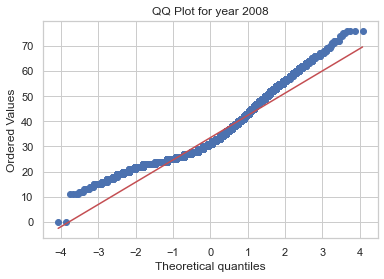

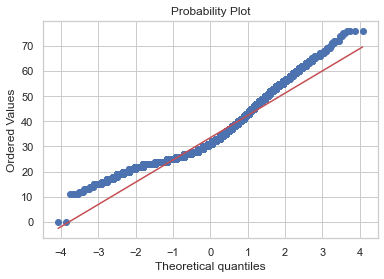

In [91]:
##QQ Plots##
fig = plt.figure()
ax = fig.add_subplot(111)
for label, data in plot_data.items():
    stats.probplot(data, dist="norm", plot=pylab)
    ax.set_title("QQ Plot for year {}".format(label))
    pylab.show()

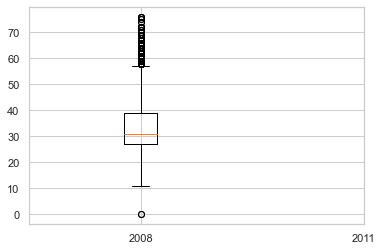

In [92]:
##Boxplots##
plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

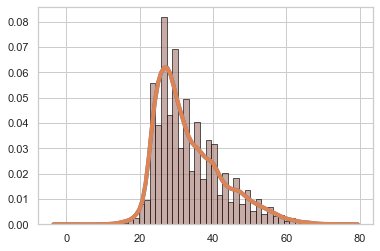

In [93]:
##Density Plots##
palette = itertools.cycle(sns.color_palette())
for data in plot_data.values():
    c = next(palette)
    sns.distplot(data, hist=True, kde=True, color = c, 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})